# Measures of Variability
A measure of variability is the measure of how spread the data is, how many unique data points it consists of, and a low dispersion indicates that the data points tend to be clustered tightly around the center while high dispersion signifies that they tend to fall further away.

**Why should we study variability?**

- The data is said to be more consistent if it is having low dispersion value since the data points will be close to each other in terms of values.
- The data is more prone to extreme values and outliers if the variability is high and will need treatment accordingly.
- Life has variability in moderation. The commute timing from home to office is one such example, where it varies daily as per traffic conditions, however if we take too much higher time than the usual commute time, then this becomes an extreme value and is really not desirable for the subject.

A simple example of different types of variability would be the flight timings. 
When we wish to book tickets according to the punctuality of the airlines then we need to study their arrival and departure times over a large sample and try to determine the general variability in the data, rather than focusing on measures of central tendency

The variance of a data set describes the average of the squared differences from the mean.

We calculate the variance by summing the squared difference from the mean for each value. For the population, we divide by the number of values $n$ in the data set.

$$population\ variance:\ \sigma^2=\frac{1}{n}\sum_{i=0}^n(x_i-\mu)^2$$

For the sample we divide the summed up values by the degrees of freedom $n-1$ (also called Bessel's correction). We use $\bar{x}$ (x bar) to symbolize our sample mean.

$$sample\ variance:\ s^2=\frac{1}{n-1}\sum_{i=0}^n(x_i-\bar{x})^2$$

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import math
plt.style.use('ggplot')

In [2]:
df = pd.read_csv("data/CardioGoodFitness.csv")
df.head()

  Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  Miles
0   TM195   18    Male         14        Single      3        4   29562    112
1   TM195   19    Male         15        Single      2        3   31836     75
2   TM195   19  Female         14     Partnered      4        3   30699     66
3   TM195   19    Male         12        Single      3        3   32973     85
4   TM195   20    Male         13     Partnered      4        2   35247     47

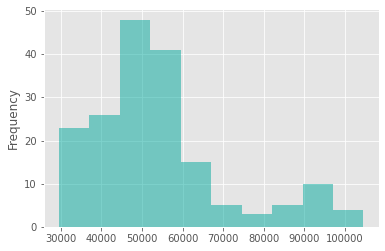

In [6]:
df.Income.plot(kind='hist', color='#00A99D', alpha=.5)

In [7]:
# Let us study the population income variance
n = len(df.Income)

# calculate the mean
mean = df.Income.mean()

# Sum up the squared differences from the mean
squared_deviations = 0
for v in df.Income:
    squared_deviations += (v - mean) ** 2

population_variance = squared_deviations / n
population_variance

270956898.45506173

In [8]:
# For a sample, the degree of freedom = n-1
dof = n - 1
sample_variance = squared_deviations / dof
sample_variance

272470624.1447548

In [11]:
# Let us try with pandas
population_variance = df.Income.var(ddof=0)
sample_variance = df.Income.var()

population_variance, sample_variance

(270956898.45506173, 272470624.1447548)

In [12]:
# we can also use numpy for the same concept
population_variance = np.var(df.Income)
sample_variance = np.var(df.Income, ddof=1)

population_variance, sample_variance

(270956898.45506173, 272470624.1447548)

# Standard Deviation

The standard deviation is the standard or typical difference between each data point and the mean. When the values in a dataset are grouped closer together, you have a smaller standard deviation. On the other hand, when the values are spread out more, the standard deviation is larger because the standard distance is greater.

The standard deviation is just the square root of the variance.

$$population\ standard\ deviation:\ \sigma=\sqrt{\frac{1}{n}\sum_{i=0}^n(x_i-\mu)^2}\ \ =\ \ \sqrt{\sigma^2}$$

We use the lowercase letter $s$ if we indicate the sample standard deviation.

$$sample\ standard\ deviation:\ s=\sqrt{\frac{1}{n-1}\sum_{i=0}^n(x_i-\bar{x})^2}\ \ =\ \ \sqrt{s^2}$$

In [13]:
# Square root of the variance
population_standard_deviation = math.sqrt(population_variance)
population_standard_deviation

16460.76846490047

In [15]:
# Similarly for a sample
sample_standard_deviation = math.sqrt(sample_variance)
sample_standard_deviation

16506.68422623862

# Empirical Rule of Standard Devations

When we have the standard deviation of a given distribution, it is easier to study the variation in the data. It can be used to determine the proportion of values of datapoints using standard deviation from the mean of the distribution. The Empirical Rule states that:
1. 68% of the values will remain between mean and first standard deviation ($\sigma_{1}$)
2. 95% of the values will remain between the mean and second standard deviation ($\sigma_{2}$)
3. 99.7% of the values will remain between the mean and third standard of deviation($\sigma_{3}$)

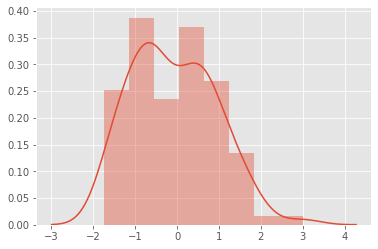

In [20]:
x = np.random.normal(size=100)
sns.distplot(x)

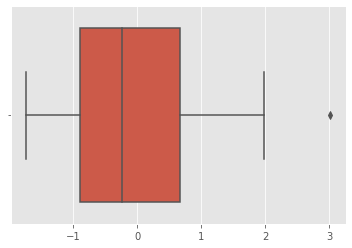

In [21]:
sns.boxplot(x)

# Range and Interquartile Range

- It refers to the difference between the maximum and minimum value present in the data.
- It is highly susceptible to outliers and can easily be swayed since it is the difference of the extreme outliers.

**Interquartile Range** refers to the middle half of the data. The data distribution is divided into four ranges:
1. Lower Quartile (Q1): It contains the quarter of the data with the lower values.
2. Upper Quartile (Q4): It contains the quarter of the data with the higher values.
3. Interquartile Range (Q3-Q1): It is the difference between the 75th percentile of data and the 25th percentile of data and contains the middle half of the entire data.

![alt-text](https://raw.githubusercontent.com/vgaurav3011/Statistics-for-Machine-Learning/master/images/IQR_worksheet.png)

- It is highly suitable for skewed distributions, and is not susceptible to outliers just like the median.

In [22]:
data = [32, 36, 46, 47, 56, 69, 75, 79, 79, 88, 89, 91, 92, 93, 96, 97,  
        101, 105, 112, 116] 
  
# First quartile (Q1) 
Q1 = np.percentile(data, 25, interpolation = 'midpoint') 
  
# Third quartile (Q3) 
Q3 = np.percentile(data, 75, interpolation = 'midpoint') 
  
# Interquaritle range (IQR) 
IQR = Q3 - Q1 
  
print(IQR) 

34.0
